In [26]:
import pandas as pd

df = pd.read_csv("news_sample.csv", dtype={0: str, 1: str})

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a dictionary called 'word_counts' with word frequencies
# Extract the top 100 most common words
top_100_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# Create a string containing the top 100 words repeated by their frequencies
wordcloud_text = ' '.join([word[0] for word in top_100_words])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Top 100 Most Common Words')
plt.axis('off')  # Turn off axis
plt.show()

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt

all_content = ' '.join(df['content'].dropna())

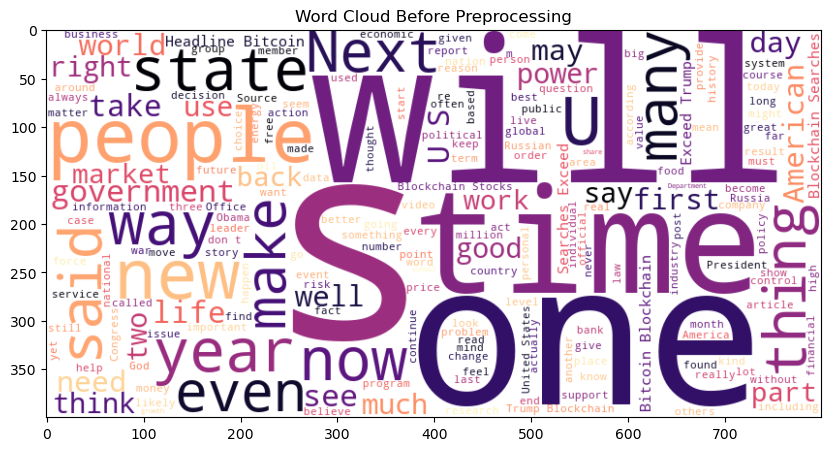

In [ ]:
wordcloud_before = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_content)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.title('Word Cloud Before Preprocessing')
plt.show()

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt

all_content = ' '.join(df['content'].dropna())

tokens = word_tokenize(all_content)

tokens = [word.lower() for word in tokens if word.isalpha()]

stop_words = set(stopwords.words('english'))
tokens_without_stopwords = [word for word in tokens if word not in stop_words]

stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in tokens_without_stopwords]

cleaned_text = ' '.join(stemmed_tokens)

In [ ]:
wordcloud_before = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(all_content)

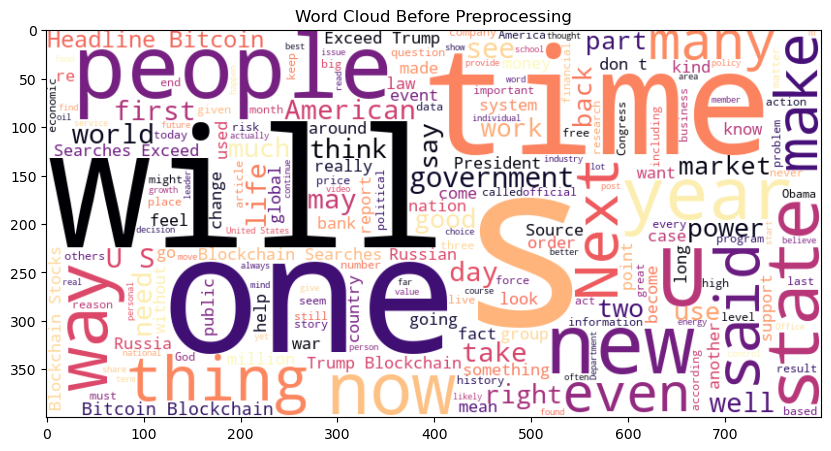

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.title('Word Cloud Before Preprocessing')
plt.show()

In [ ]:
wordcloud_after = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(cleaned_text)


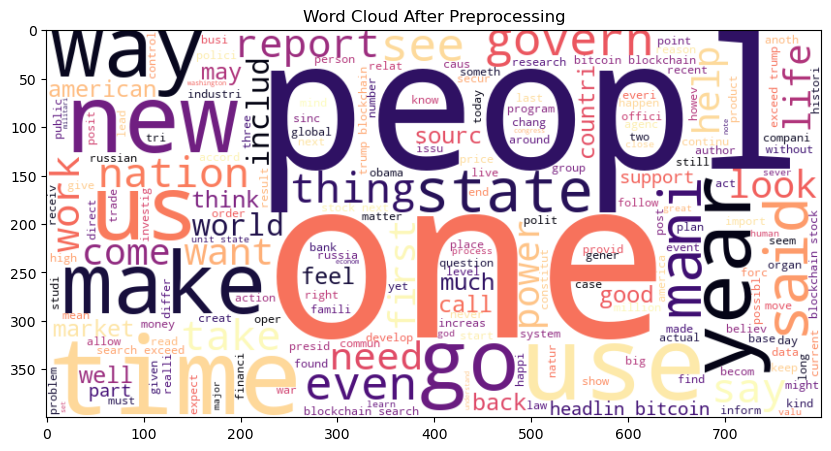

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.title('Word Cloud After Preprocessing')
plt.show()

In [ ]:
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Create a dictionary to store the number of words before and after preprocessing for each category
word_counts = defaultdict(lambda: {'before': 0, 'after': 0})

# Loop through each category
for category in df['type'].unique():
    # Filter articles belonging to the current category
    category_articles = df[df['type'] == category]
    
    # Preprocess the textual content for each article in the category
    for text in category_articles['content']:
        # Tokenize the text
        tokens = word_tokenize(text.lower())
        
        # Remove stopwords and apply stemming
        cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
        
        # Compute the number of words before preprocessing
        num_words_before = len(tokens)

        # Compute the number of words after removing stopwords and applying stemming
        num_words_after = len(cleaned_tokens)

        # Update the word counts dictionary for the current category
        word_counts[category]['before'] += num_words_before
        word_counts[category]['after'] += num_words_after

# Print the word counts for each category
for category, counts in word_counts.items():
    print(f"Category: {category}")
    print(f"Number of words before preprocessing: {counts['before']}")
    print(f"Number of words after preprocessing: {counts['after']}\n")

Category: unreliable
Number of words before preprocessing: 2171
Number of words after preprocessing: 1297

Category: fake
Number of words before preprocessing: 119604
Number of words after preprocessing: 74057

Category: clickbait
Number of words before preprocessing: 328
Number of words after preprocessing: 197

Category: conspiracy
Number of words before preprocessing: 29070
Number of words after preprocessing: 17692

Category: reliable
Number of words before preprocessing: 1590
Number of words after preprocessing: 995

Category: bias
Number of words before preprocessing: 3120
Number of words after preprocessing: 1913

Category: hate
Number of words before preprocessing: 67
Number of words after preprocessing: 43

Category: junksci
Number of words before preprocessing: 2487
Number of words after preprocessing: 1580

Category: political
Number of words before preprocessing: 17380
Number of words after preprocessing: 10635

Category: unknown
Number of words before preprocessing: 16361


In [ ]:
from collections import defaultdict, Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Create a dictionary to store the number of words before and after preprocessing for each category
word_counts = defaultdict(lambda: {'before': Counter(), 'after': Counter()})

# Loop through each category
for category in df['type'].unique():
    # Filter articles belonging to the current category
    category_articles = df[df['type'] == category]
    
    # Preprocess the textual content for each article in the category
    for text in category_articles['content']:
        # Tokenize the text
        tokens = word_tokenize(text.lower())
        
        # Remove stopwords and apply stemming
        cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
        
        # Update the Counter for words before preprocessing
        word_counts[category]['before'].update(tokens)

        # Update the Counter for words after removing stopwords and applying stemming
        word_counts[category]['after'].update(cleaned_tokens)

# Get the 100 most common words before and after preprocessing for each category
top_100_words = defaultdict(dict)
for category, counts in word_counts.items():
    top_100_words[category]['before'] = counts['before'].most_common(100)
    top_100_words[category]['after'] = counts['after'].most_common(100)

# Print the most common 100 words before and after preprocessing for each category
for category, words in top_100_words.items():
    print(f"Category: {category}")
    print("Most common words before preprocessing:", words['before'])
    print("Most common words after preprocessing:", words['after'])
    print()


Category: unreliable
Most common words before preprocessing: [('the', 124), ('.', 81), ('of', 67), (',', 67), ('a', 52), ('to', 46), ('in', 42), ('and', 37), ('was', 21), ('this', 21), ('that', 19), ('with', 18), ('it', 18), ('on', 17), ('is', 15), ('as', 15), ('by', 15), ('shark', 15), ('at', 13), ('their', 13), ('its', 13), ('not', 12), ('these', 12), ('they', 12), (':', 12), ('you', 11), ('for', 11), ('were', 11), ('’', 11), ('s', 10), ('have', 10), ('be', 9), ('police', 9), ('cases', 9), ('about', 8), ('from', 8), ('are', 8), ('sermon', 8), ('what', 8), ('new', 8), ('or', 8), ('only', 8), ('who', 7), ('people', 7), ('but', 7), ('had', 7), ('friday', 7), ('13th', 7), ('“', 7), ('”', 7), ('do', 6), ('congregation', 6), ('an', 6), ('like', 6), ('time', 6), ('his', 6), ('?', 6), ('when', 6), ('kyle', 6), ('up', 6), ('disanti', 6), ('can', 5), ('could', 5), ('ladies', 5), ('because', 5), ('them', 5), ('out', 5), ('never', 5), ('hike', 5), ('alone', 5), ('fan', 5), ('film', 5), ('found',